#### Data Loading

In [ ]:
import pandas as pd

df = pd.read_csv(r"psychonaut_experience_reports.csv", encoding='ISO-8859-1')

In [2]:
df.head()

,title,report_text,effects_terms
0,Experience:1050 Âµg 1cP-LSD - The matrix,>Report\nAfter 1P-LSD and other LSD derivative...,"Time Distortion,Visual Disconnection,Memory Su..."
1,Experience:35mg 4-AcO-DMT (rectal) - Colorful ...,>Report\n\nI haven't written a trip report in ...,NaN
2,Experience:26mg - Stage 3 Trip,">Report\nWalking to a friends house, I popped ...","Anxiety,Time distortion,Geometry,Visual acuity..."
3,Experience:26mg - I begged the shroom aliens t...,>Report\nI took 26mg of 4-aco-dmt alone in my ...,"Anxiety,Time distortion,Autonomous entities,Na..."
4,Experience:25mg 4-AcO-DMT (insufflated) - An i...,>Report\nI have previous experience with LSD (...,NaN


In [3]:
df.shape

(372, 3)

In [4]:
# Count rows with NaN in 'effects_terms'
missing_count = df['effects_terms'].isna().sum()
print(f"Missing effects_terms: {missing_count}")

Missing effects_terms: 141


In [5]:
#Dropping rows
df = df[df['effects_terms'].notna() & df['effects_terms'].str.strip().ne('')]

In [6]:
df.shape

(231, 3)

In [7]:
# Convert comma-separated strings to list of terms
df['effects_terms'] = df['effects_terms'].apply(lambda x: [term.strip() for term in x.split(',')])

In [8]:
df.head()

,title,report_text,effects_terms
0,Experience:1050 Âµg 1cP-LSD - The matrix,>Report\nAfter 1P-LSD and other LSD derivative...,"[Time Distortion, Visual Disconnection, Memory..."
2,Experience:26mg - Stage 3 Trip,">Report\nWalking to a friends house, I popped ...","[Anxiety, Time distortion, Geometry, Visual ac..."
3,Experience:26mg - I begged the shroom aliens t...,>Report\nI took 26mg of 4-aco-dmt alone in my ...,"[Anxiety, Time distortion, Autonomous entities..."
5,Experience:25mg (insufflated) - Simultaneously...,>Report\nSometimes people who should know bett...,"[Perspective distortions, Time distortion, 3-D..."
6,Experience:25mg - A labyrinth of organs and a ...,">Report\nMe and my best friend are 18, the ant...","[Focus suppression, Tactile enhancement, Empat..."


In [9]:
print(type(df['effects_terms'].iloc[0]))  # should print <class 'list'>

<class 'list'>


#### Simple Cleaning

In [10]:
import re
def clean_text(text):
    # Remove markers like '>Report', '>Report\n\n', '==Heading==', etc.
    text = re.sub(r'^>?Report\s*', '', text, flags=re.IGNORECASE)
    text = re.sub(r'=+.*?=+', '', text)  # Remove MediaWiki-style headings (==Title==)
    return text.strip()

df['report_text'] = df['report_text'].apply(clean_text)

In [11]:
# Normalize white space
df['report_text'] = df['report_text'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [12]:
df['report_text'] = df['report_text'].str.encode('latin1', errors='ignore').str.decode('utf-8', errors='ignore')

In [13]:
df.head(3)

,title,report_text,effects_terms
0,Experience:1050 Âµg 1cP-LSD - The matrix,After 1P-LSD and other LSD derivatives were pr...,"[Time Distortion, Visual Disconnection, Memory..."
2,Experience:26mg - Stage 3 Trip,"Walking to a friends house, I popped a gel cap...","[Anxiety, Time distortion, Geometry, Visual ac..."
3,Experience:26mg - I begged the shroom aliens t...,I took 26mg of 4-aco-dmt alone in my bedroom a...,"[Anxiety, Time distortion, Autonomous entities..."


In [15]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
df['token_length'] = df['report_text'].apply(lambda x: len(tokenizer.tokenize(x)))

print(df['token_length'].describe())

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\Admin\anaconda3\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (628 > 512). Running this sequence through the model will result in indexing errors


count     231.000000
mean      993.419913
std       835.922730
min         0.000000
25%       449.000000
50%       757.000000
75%      1359.500000
max      5302.000000
Name: token_length, dtype: float64


In [16]:
from itertools import chain

# Flatten all lists into one long list of labels
all_labels = list(chain.from_iterable(df['effects_terms']))

# Get the set of unique labels
unique_labels = set(all_labels)

# Print count and list
print(f"Total unique effect labels: {len(unique_labels)}")
print(sorted(unique_labels))

Total unique effect labels: 336
['', '25I-NBOMe', '2C-B', '2C-P', '3-Dimensional textures', '3-MeO-PCP', '8A Geometry', '8A_Geometry_-_Exposure_to_semantic_concept_network', '8B - Perceived exposure to inner mechanics of consciousness', '8B Geometry', 'Abnormal heartbeat', 'Acuity enhancement', 'Acuity suppression', 'Addiction suppression', 'After images', 'Amnesia', 'Analysis enhancement', 'Analysis suppression', 'Anesthesia', 'Anxiety', 'Anxiety suppression', 'Appetite Suppression', 'Appetite enhancement', 'Appetite suppression', 'Auditory distortion', 'Auditory enhancement', 'Auditory enhancements', 'Auditory hallucination', 'Auditory hallucinations', 'Auditory suppression', 'Autonomous entities', 'Autonomous voice communication', 'Autonomus entities', 'Blurred / Double vision', 'Bodily control enhancement', 'Bodily pressures', 'Breathing', 'Brightness Alteration', 'Brightness alteration', 'Bronchodilation', 'Catharsis', 'Changes in felt bodily form', 'Changes in felt gravity', 'Cha

In [18]:
def clean_label(label):
    label = label.strip()                         # Remove leading/trailing spaces
    label = label.lower()                         # Normalize casing
    label = label.replace('_', ' ')               # Underscores → spaces
    label = label.replace('-', ' ')               # Dashes → spaces
    label = re.sub(r'\s+', ' ', label)            # Collapse multiple spaces
    return label.strip()

df['effects_terms'] = df['effects_terms'].apply(lambda labels: [clean_label(l) for l in labels])

In [19]:
df['effects_terms'] = df['effects_terms'].apply(
    lambda labels: [l for l in labels if l and len(l.split()) < 8 and len(l) < 50]
)

In [20]:
blocklist = {'lsd', 'mdma', 'dmt', 'lsa', 'dph', 'tapentadol', 'etizolam', 'promethazine'}
df['effects_terms'] = df['effects_terms'].apply(
    lambda labels: [l for l in labels if l not in blocklist]
)

In [21]:
df['effects_terms'] = df['effects_terms'].apply(lambda x: sorted(list(set(x))))

In [22]:
from itertools import chain

unique_cleaned_labels = sorted(set(chain.from_iterable(df['effects_terms'])))
print(f"Cleaned label count: {len(unique_cleaned_labels)}")

Cleaned label count: 283


In [23]:
df.head(7)

,title,report_text,effects_terms,token_length
0,Experience:1050 Âµg 1cP-LSD - The matrix,After 1P-LSD and other LSD derivatives were pr...,"[brightness alteration, cognitive disconnectio...",628
2,Experience:26mg - Stage 3 Trip,"Walking to a friends house, I popped a gel cap...","[anxiety, geometry, nausea, time distortion, v...",461
3,Experience:26mg - I begged the shroom aliens t...,I took 26mg of 4-aco-dmt alone in my bedroom a...,"[anxiety, autonomous entities, internal halluc...",722
5,Experience:25mg (insufflated) - Simultaneously...,Sometimes people who should know better do stu...,"[3 dimensional textures, autonomous entities, ...",1905
6,Experience:25mg - A labyrinth of organs and a ...,"Me and my best friend are 18, the antisocial n...","[and sociability enhancement, brightness alter...",927
8,"Experience:4-AcO-DMT (20mg) - High Weight, No ...",I want to preface this by saying this wasn't m...,"[internal hallucination, sedation]",473
9,Experience:20mg (insufflated) - Three years of...,I experience eye of providence visuals frequen...,[unity and interconnectedness],838


<Figure size 3000x600 with 0 Axes>

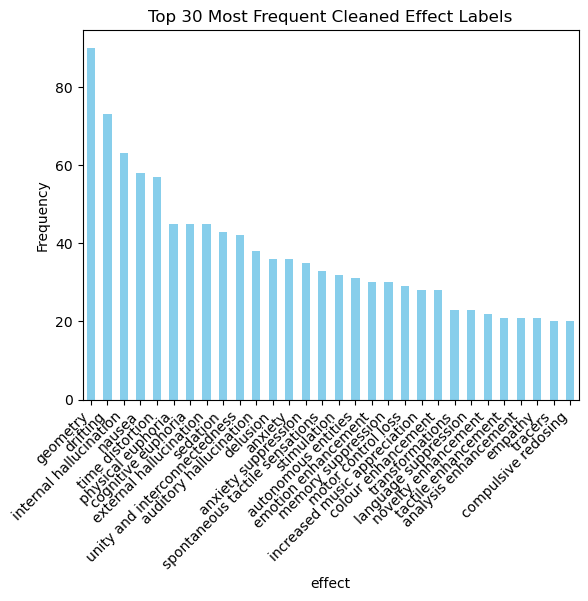

In [34]:
import matplotlib.pyplot as plt
# Flatten all labels and count
all_labels = list(chain.from_iterable(df['effects_terms']))
label_counts = Counter(all_labels)

# Convert to DataFrame
label_freq_df = pd.DataFrame(label_counts.items(), columns=["effect", "count"])
label_freq_df = label_freq_df.sort_values(by="count", ascending=False)

# Plot top 30
plt.figure(figsize=(30, 6))  # Or 30 for very long labels
label_freq_df.head(30).plot(kind='bar', x='effect', y='count', legend=False, color='skyblue')
plt.title("Top 30 Most Frequent Cleaned Effect Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
df.to_csv("cleaned_experience_reports.csv", index=False)